['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']
Processing Image: /cont

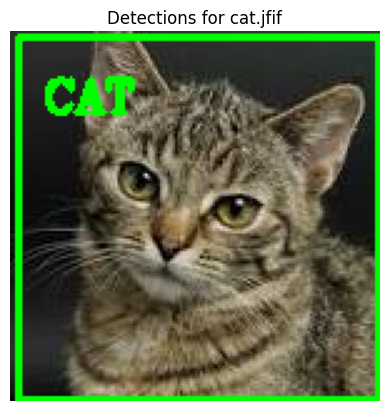

Processing Image: /content/imgs/badminton.jfif
Class IDs: [43]
Bounding Boxes: [[ 30  19 163  94]]
Detected object: TENNIS RACKET


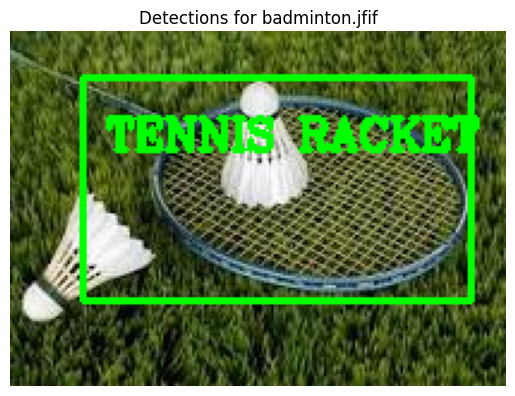

Processing Image: /content/imgs/airplane.jfif
Class IDs: [5]
Bounding Boxes: [[  2  43 225  62]]
Detected object: AIRPLANE


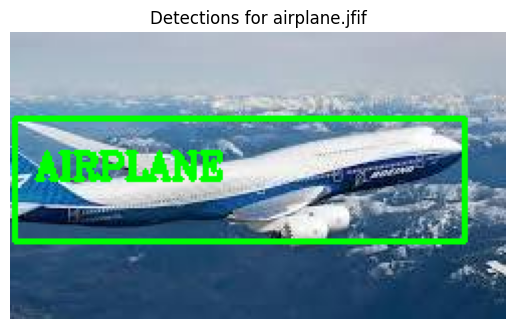

Processing Image: /content/imgs/lena.jfif
Class IDs: [18 88]
Bounding Boxes: [[ 27  25 121 123]
 [ 20  22 131 125]]
Detected object: DOG
Detected object: TEDDY BEAR


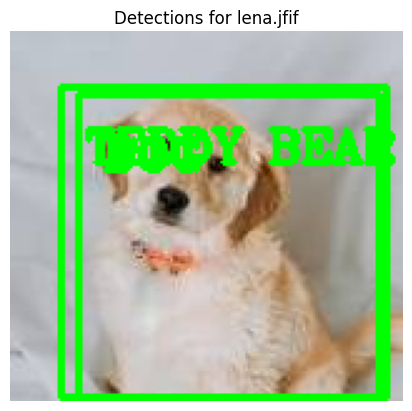

In [16]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

namesofClass = []
Class = '/content/coco.names'
with open(Class, 'rt') as f:
    namesofClass = f.read().rstrip('\n').split('\n')

print(namesofClass)

configuration = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weights = '/content/frozen_inference_graph.pb'

net = cv2.dnn_DetectionModel(weights, configuration)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

image_folder = "/content/imgs/"
image_paths = glob.glob(os.path.join(image_folder, "*.jfif"))

for img_path in image_paths:

    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not read image {img_path}")
        continue

    ClassIds, confs, bbox = net.detect(img, confThreshold=0.5)
    print(f"Processing Image: {img_path}")
    print("Class IDs:", ClassIds)
    print("Bounding Boxes:", bbox)

    if len(ClassIds) != 0:
        for classId, box in zip(ClassIds.flatten(), bbox):
            label = namesofClass[classId - 1].upper()
            cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
            cv2.putText(img, label, (box[0] + 10, box[1] + 30), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0, 255, 0), 2)
            print(f"Detected object: {label}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img_rgb)
    plt.title(f"Detections for {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


# New Section